Question 1:

Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

    R&D Spend -- Research and devolop spend in the past few years
    Administration -- spend on administration in the past few years
    Marketing Spend -- spend on Marketing in the past few years
    State -- states from which data is collected
    Profit  -- profit of each state in the past few years

In [1]:
# importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Downloads/startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
data.shape

(50, 5)

In [7]:
# renaming column names
data = data.rename({'R&D Spend':'RnD','Marketing Spend':'Marketing_spend'},axis = 1)

In [9]:
data.head()

,RnD,Administration,Marketing_spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [10]:
data.isnull().sum()

RnD                0
Administration     0
Marketing_spend    0
State              0
Profit             0
dtype: int64

In [11]:
# checking datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RnD              50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing_spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.3+ KB


In [13]:
# checking for duplicated values
data[data.duplicated()]

,RnD,Administration,Marketing_spend,State,Profit


<Axes: >

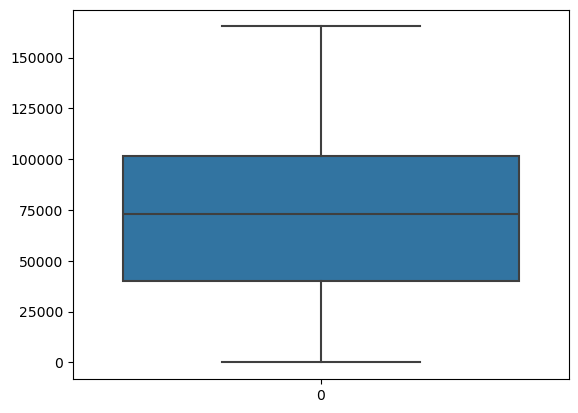

In [15]:
# finding outliers
sns.boxplot(data['RnD'])

<Axes: >

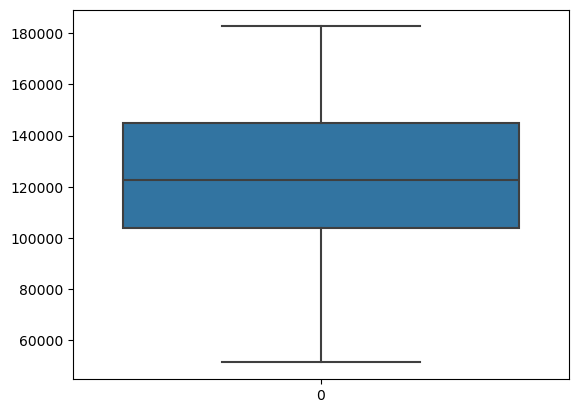

In [16]:
sns.boxplot(data['Administration'])

<Axes: >

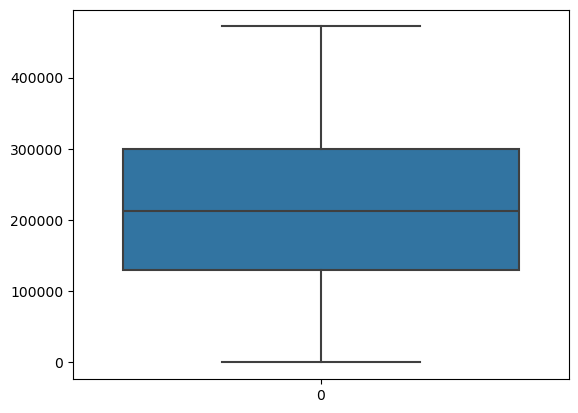

In [17]:
sns.boxplot(data['Marketing_spend'])

<Axes: >

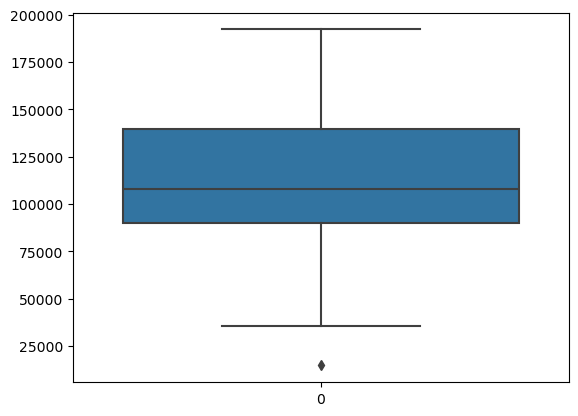

In [19]:
sns.boxplot(data['Profit'])

In [42]:
# There is a outlier in profit
# removing the outlier
from scipy.stats import iqr
IQR = iqr(data['Profit'], rng=(25,75))


49627.07499999998

In [47]:
Q1 = np.quantile(data['Profit'],0.25)
Q2 = np.quantile(data['Profit'],0.75)
Lower_limit = Q1 - (1.5*IQR)
Upper_limit = Q3 - (1.5*IQR)

In [49]:
print('Lower_limit: ',Lower_limit)
print('Upper_limit: ',Upper_limit)

Lower_limit:  15698.290000000023
Upper_limit:  65325.365000000005


In [56]:
outlier = data[data['Profit']<15698]

In [79]:
outlier

,RnD,Administration,Marketing_spend,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [70]:
# imputing the median value to handle the outlier
data.loc[49,'Profit'] = data['Profit'].median()

In [71]:
data

,RnD,Administration,Marketing_spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.8300
1,162597.70,151377.59,443898.53,California,191792.0600
2,153441.51,101145.55,407934.54,Florida,191050.3900
3,144372.41,118671.85,383199.62,New York,182901.9900
4,142107.34,91391.77,366168.42,Florida,166187.9400
5,131876.90,99814.71,362861.36,New York,156991.1200
6,134615.46,147198.87,127716.82,California,156122.5100
7,130298.13,145530.06,323876.68,Florida,155752.6000
8,120542.52,148718.95,311613.29,New York,152211.7700
9,123334.88,108679.17,304981.62,California,149759.9600


<Axes: >

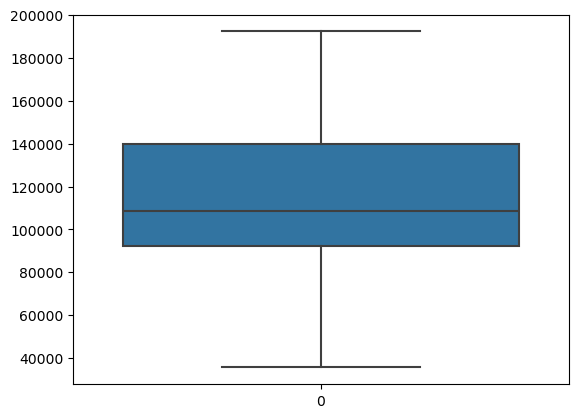

In [72]:
sns.boxplot(data['Profit'])

In [76]:
#lets check how this model works
import statsmodels.formula.api as smf
model1  = smf.ols("Profit~RnD+Administration+Marketing_spend", data = data).fit()

In [78]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     170.8
Date:                Wed, 13 Mar 2024   Prob (F-statistic):           6.08e-25
Time:                        20:12:15   Log-Likelihood:                -535.01
No. Observations:                  50   AIC:                             1078.
Df Residuals:                      46   BIC:                             1086.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.597e+04   7967.924      7.024      0.000    3.99e+04     7.2e+04
RnD                 0.7470      0.055     13.647      0.000       0.637       0.857
Administration     -0.0149      0.062     -0.241      0.811      -0.139       0.110
Marketing_spend     0.0221      0.020      1.107      0.274      -0.018       0.062
==============================================================================
Omnibus:                       45.911   Durbin-Watson:                   1.600
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              241.118
Skew:                           2.248   Prob(JB):                     4.38e-53
Kurtosis:                      12.774   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We dont how better is this model. 

Lets create another model by removing the outlier

In [82]:
#Removing outlier
removed_outlier = data.drop(49)
removed_outlier

,RnD,Administration,Marketing_spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [83]:
model2 = smf.ols("Profit~RnD+Administration+Marketing_spend",data = removed_outlier).fit()
model2

In [84]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Wed, 13 Mar 2024   Prob (F-statistic):           8.85e-32
Time:                        20:19:49   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
RnD                 0.7830      0.038     20.470      0.000       0.706       0.860
Administration     -0.0222      0.043     -0.518      0.607      -0.109       0.064
Marketing_spend     0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

As we can see the Model2 is performing better than model1 so we will continue with model2

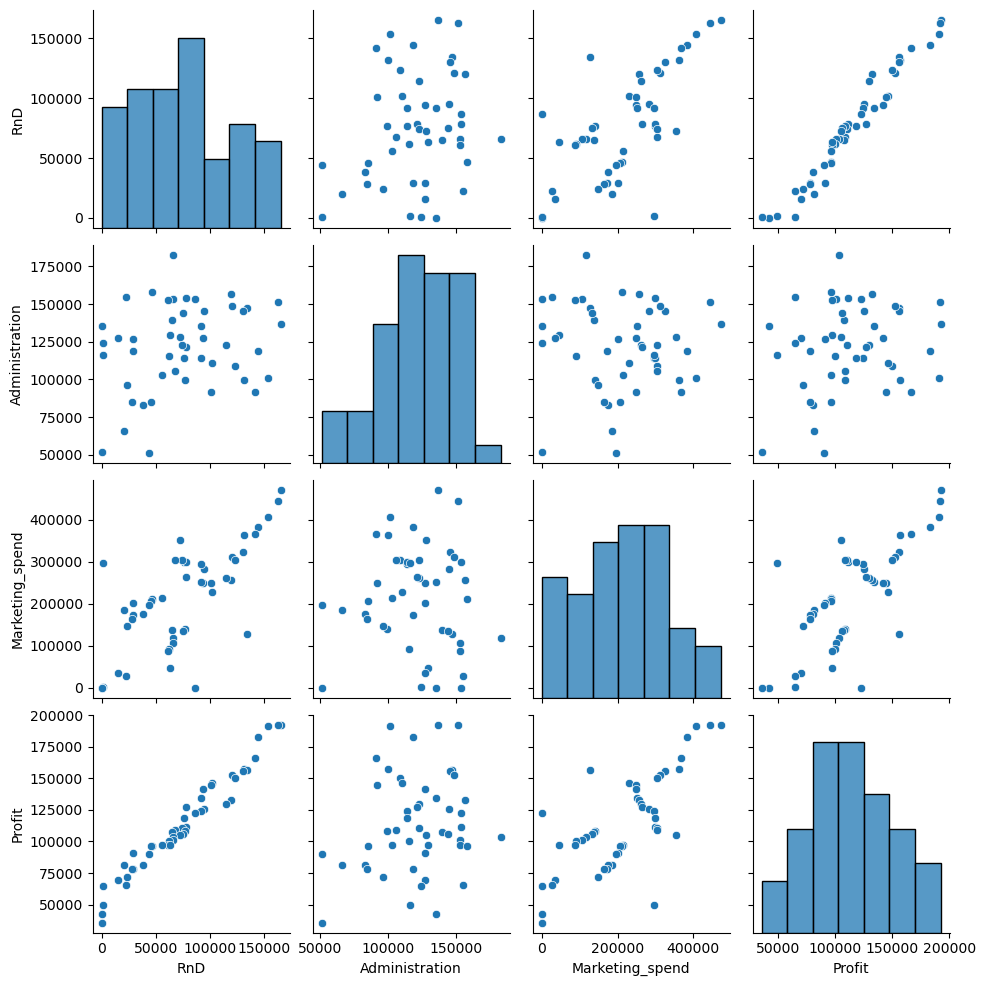

In [85]:
# checking the correlation of all the features
sns.pairplot(removed_outlier)

In [88]:
# building model with individual independent features and comparing them
compare_model_ = smf.ols("Profit~RnD",data = removed_outlier).fit()
compare_model.pvalues, compare_model.tvalues,compare_model.params


(Intercept    2.221695e-27
 RnD          7.555104e-34
 dtype: float64,
 Intercept    23.195381
 RnD          32.476518
 dtype: float64,
 Intercept    51723.694794
 RnD              0.827841
 dtype: float64)

In [91]:
compare_model_2 = smf.ols("Profit~Administration",data = removed_outlier).fit()
compare_model_2.pvalues, compare_model_2.tvalues, compare_model_2.params

(Intercept         0.001618
 Administration    0.155918
 dtype: float64,
 Intercept         3.346236
 Administration    1.442053
 dtype: float64,
 Intercept         80285.440169
 Administration        0.277629
 dtype: float64)

In [93]:
compare_model_3 = smf.ols("Profit~Administration+RnD",data = removed_outlier).fit()
compare_model_3.pvalues, compare_model_3.tvalues, compare_model_3.params

(Intercept         1.210032e-14
 Administration    2.728844e-01
 RnD               5.451979e-33
 dtype: float64,
 Intercept         11.130771
 Administration    -1.109727
 RnD               31.847140
 dtype: float64,
 Intercept         56822.774379
 Administration       -0.046378
 RnD                   0.834924
 dtype: float64)

In [94]:
compare_model_4 = smf.ols("Profit~Administration+RnD+Marketing_spend",data = removed_outlier).fit()
compare_model_4.pvalues, compare_model_4.tvalues, compare_model_4.params

(Intercept          2.960000e-12
 Administration     6.070728e-01
 RnD                1.971077e-24
 Marketing_spend    7.458443e-02
 dtype: float64,
 Intercept           9.450782
 Administration     -0.517889
 RnD                20.469501
 Marketing_spend     1.825383
 dtype: float64,
 Intercept          52382.439251
 Administration        -0.022201
 RnD                    0.783002
 Marketing_spend        0.025234
 dtype: float64)

Checking Collinearity between independent variables

In [99]:
#VIF = 1/1-R2
rsq1 = smf.ols("Administration~Marketing_spend+RnD",data = removed_outlier).fit()
VIF1 = 1/(1-rsq1.rsquared)
VIF1

1.1751717842324871

In [100]:
rsq2 = smf.ols("Marketing_spend~Administration+RnD",data = removed_outlier).fit()
VIF2 = 1/(1-rsq2.rsquared)
VIF2

2.2399568221016826

In [101]:
rsq3 = smf.ols("RnD~Administration+Marketing_spend",data = removed_outlier).fit()
VIF3 = 1/(1-rsq3.rsquared)
VIF3

2.3777540899785308

In [104]:
df = {'Model':['rsq1','rsq2','rsq3'],'VIF':[VIF1,VIF2,VIF3]}
pd.DataFrame(df)

,Model,VIF
0,rsq1,1.175172
1,rsq2,2.239957
2,rsq3,2.377754


As the VIF value is less than 5 therefore the collinearty will not affect our final model.
So considering all vairables for linear regression.

In [135]:
removed_outlier.head()

,RnD,Administration,Marketing_spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [146]:
X = removed_outlier.iloc[:,[0,1,2]]
y = removed_outlier.iloc[:,4]



In [149]:
#feature scaling
import numpy as np
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_X = sc.fit_transform(X)
scaled_y = sc.fit_transform(y)


In [150]:
# splitting the dataset into training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(scaled_X,scaled_y,test_size = 0.25,random_state = 42)

In [151]:
#Now building the final model
from sklearn.linear_model import LinearRegression
final_model = LinearRegression()
final_model.fit(X_train,y_train)

LinearRegression()

In [152]:
# intercept and coefficiet values
final_model.intercept_, final_model.coef_

(array([-0.01859338]), array([[ 0.9157031 , -0.0293259 ,  0.12120991]]))

In [154]:
#prediction
y_pred = final_model.predict(X_test)
y_pred

array([[ 0.3491814 ],
       [-1.75840006],
       [-1.79263967],
       [-1.32948364],
       [ 0.42402611],
       [ 0.05098116],
       [-0.12147539],
       [-0.33141673],
       [-0.46781679],
       [-0.03933608],
       [ 0.39326081],
       [ 1.53780006],
       [-0.65082042]])

In [160]:
sc.inverse_transform(y_pred)

array([[127190.97231034],
       [ 47567.10013381],
       [ 46273.53658697],
       [ 63771.44932716],
       [130018.58588453],
       [115925.04573526],
       [109409.68262409],
       [101478.1544059 ],
       [ 96324.99592087],
       [112512.88443271],
       [128856.28080804],
       [172096.67210812],
       [ 89411.16692055]])

In [155]:
#rsquare value
from sklearn.metrics import r2_score
rsquare = r2_score(y_test,y_pred)
rsquare

0.9341582772336137

In [162]:
# mean absolute error and mean squared error
from sklearn.metrics import mean_absolute_error, mean_squared_error
MAE = mean_absolute_error(y_test,y_pred)
MAE

0.18762086409480588

In [164]:
MSE = mean_squared_error(y_test,y_pred)
MSE

0.04926851225232688

In [165]:
RMSE = np.sqrt(MSE)
RMSE

0.22196511494450402

In [172]:
df1 = {'Model_metrics':['rsquare','MAE','MSE','RMSE'],'scores':[rsquare,MAE,MSE,RMSE]}
df1 = pd.DataFrame(df1)
df1

,Model_metrics,scores
0,rsquare,0.934158
1,MAE,0.187621
2,MSE,0.049269
3,RMSE,0.221965
